# Markowitzova teorie portfolia

## Import knihoven

Importujeme knihovny obsahující funkce potřebné k výpčtům výnosů, rizik a dalších hodnot sloužící k optimalizaci portfolia. Jedná se o námi vytvořené knihovny akcie, portfolio, tisk.
- akcie: funkce sloužící k výpočtům veličin u jednotlivých akcií
- portfolio: funkce sloužící k výpočtům veličin celého portfolia
- tisk: funkce sloužící k tisku hodnot vybraných veličin ve formě grafu do složky

In [1]:
from knihovna import akcie
from knihovna import portfolio
from knihovna import tisk

import matplotlib.pyplot as plt
import numpy as np

## Část první - portfolio s dvěmi aktivy

V této čísti se budeme zabývat výpočty portfolia tvořeného dvěma aktivy. V našem případě to znamená portoflio tvořené dvěmi akciemi - MTU a RWE. Tyto akcie sledujeme v období 500 dnů, přičemž jeden obchodní měsíc má 20 dní. Výpočty budeme provádět s datovou historií jednoho roku (240 dní) a použijeme aktivní investiční strategii, tzn. investor bude měnit vklady každý měsíc. 

### Načítání dat ze souboru

Nejprve musíme načíst data o akciích - MTU a RWE. Soubory obsahují data a ceny akcií v jentolivých dnech. Do proměnné data1 nahrajeme ceny akcie MTU a do proměnné data2 nahrajeme ceny akcie RWE.

In [2]:
data1 = akcie.nacist_data("testovaci_data/mtu.txt")
data2 = akcie.nacist_data("testovaci_data/rwe.txt")

### Tisk dat

Pro ilustraci data vytiskneme na standartní výstup. Tyto data budou potřeba k dalším výpočtům. Dále si je však zobrazovat nepotřebujeme.

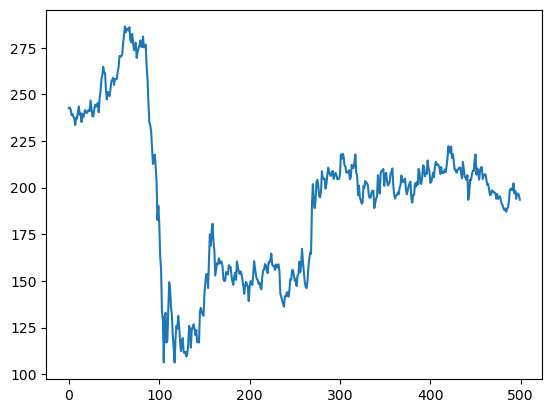

In [3]:
plt.plot(data1)
plt.show()

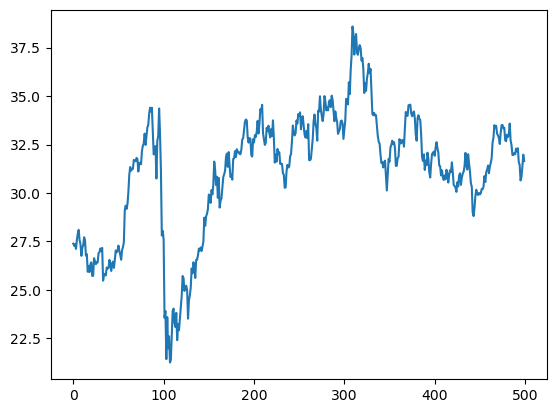

In [4]:
plt.plot(data2)
plt.show()

### Výpočty hodnot a rizik u jednotlivých akcií
Výpočet denních výnosů ($dv$), druhých mocnin denních výnosů ($dm$), měsíčních středních výnosů ($mv$), měsíčních středních rizik ($mr$), středních výnosů ($stv$) a středních rizik ($str$) jednotlivých akcií.

- Denní výnosy:

Pro každý jeden den kromě nultého vypočítáme výnos akcie.

$dv[i] = \frac{data1[i]-data1[i-1]}{data1[i-1]}$, pro $i = 1, ..., len(data1)$

- Druhé mocniny denních výnosů:

Pomocná proměnná potřebná pro jiné výpočty.

$dm[i] = (dv[i])^2$, pro $i = 1, ..., len(data1)$

- Střední výnosy:

Výpočet středního výnosu akcie za dané období z historických dat. V našem případě musíme tento výpočet provést 13x. 

$stv = \frac{1}{len(data1)}\sum_{i=1}^{len(data1)} dv[i]$

- Střední rizika:

Výpočet středního rizika akcie za dané období z historických dat. V našem případě musíme tento výpočet provést 13x.

$str = \sqrt{\frac{1}{len(data1)-1}\sum_{i=1}^{len(data1)} (dv[i])^2 - \frac{1}{len(data1)(len(data1)-1)}(\sum_{i=1}^{len(data1)} dv[i])^2}$

- Měsíční střední výnosy:

Plyne z výpočtu středního výnosu. 

$mv = 20stv$

- Měsíční střední rizika:

Plyne z výpočtu středního rizika.

$mr = \sqrt{20}str$


In [5]:
dv1, dm1, mv1, mr1, stv1, str1 = akcie.investicni_strategie(data1, 240, 20)
dv2, dm2, mv2, mr2, stv2, str2 = akcie.investicni_strategie(data2, 240, 20)

Pro ilustraci provedeme tisk na standartním výstupu.

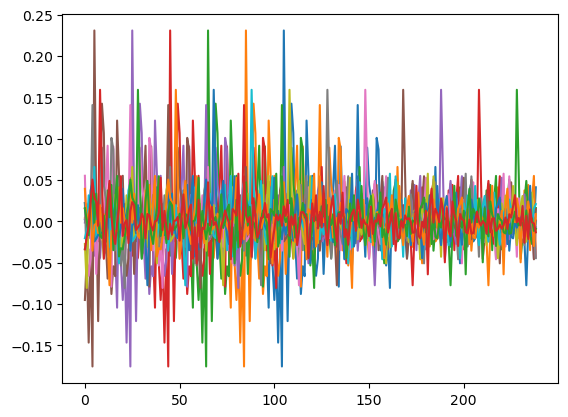

In [6]:
plt.plot(dv1)
plt.show()

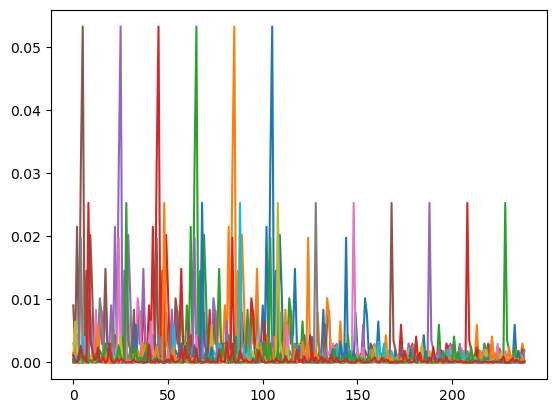

In [7]:
plt.plot(dm1)
plt.show()

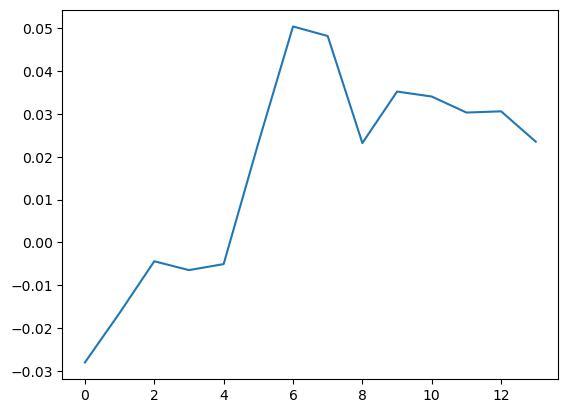

In [8]:
plt.plot(mv1)
plt.show()

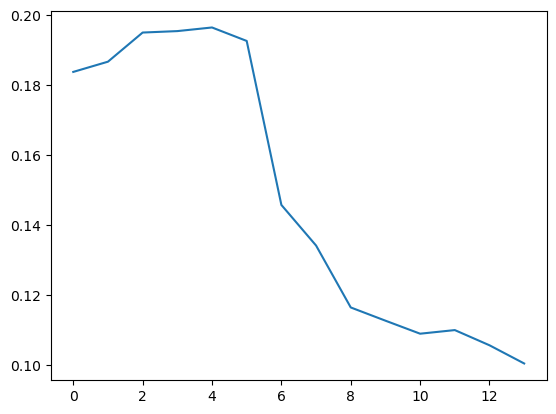

In [9]:
plt.plot(mr1)
plt.show()

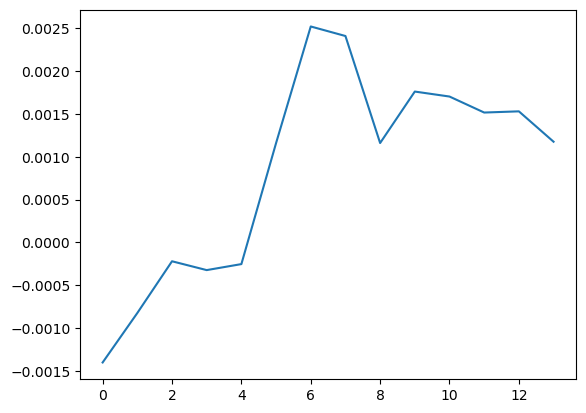

In [10]:
plt.plot(stv1)
plt.show()

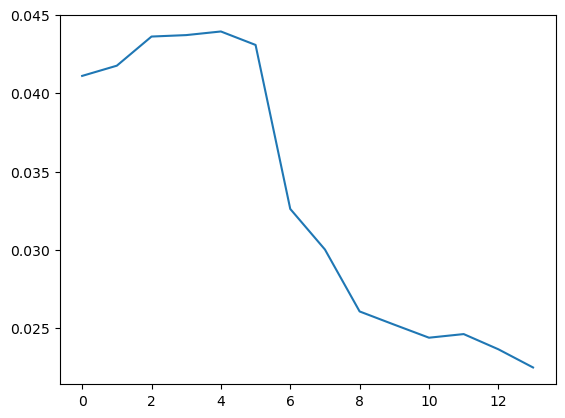

In [11]:
plt.plot(str1)
plt.show()

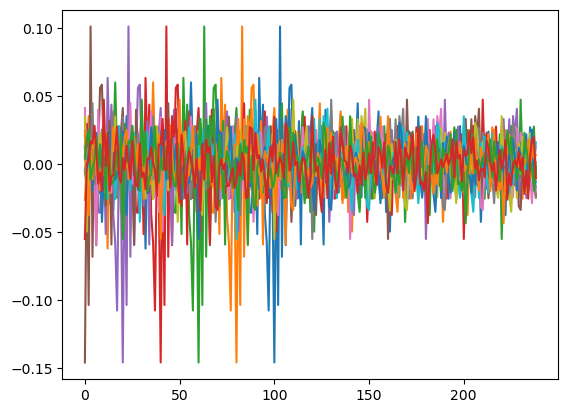

In [12]:
plt.plot(dv2)
plt.show()

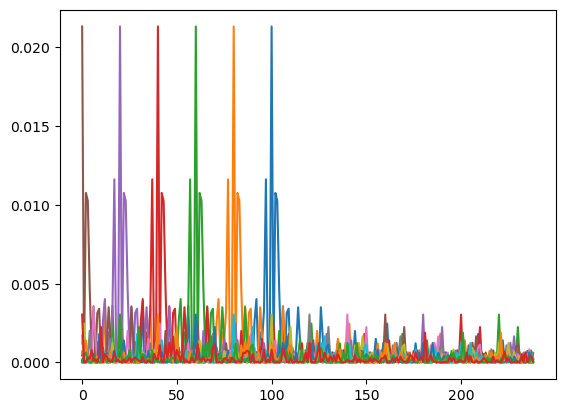

In [13]:
plt.plot(dm2)
plt.show()

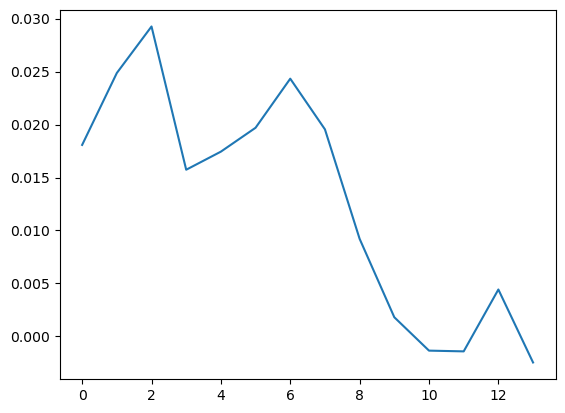

In [14]:
plt.plot(mv2)

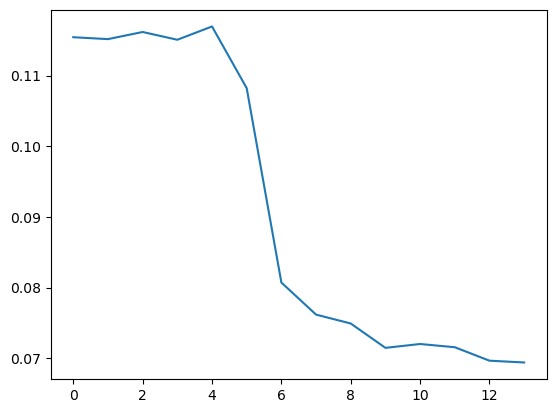

In [15]:
plt.plot(mr2)
plt.show()

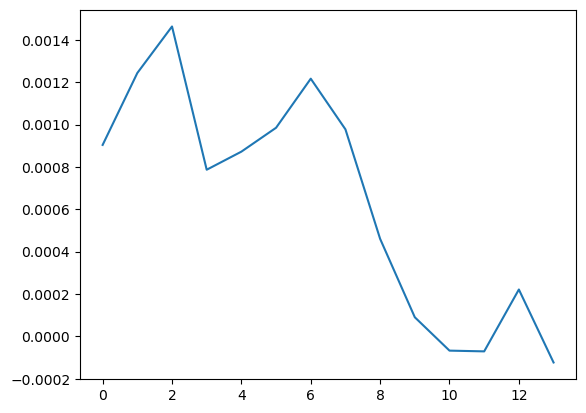

In [16]:
plt.plot(stv2)
plt.show()

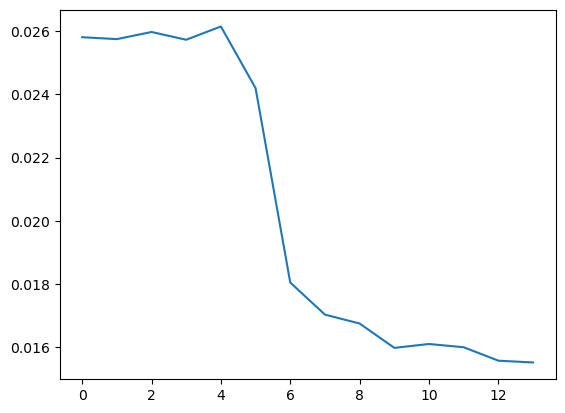

In [17]:
plt.plot(str2)
plt.show()

### Výpočet kovariance

Kovariance popisuje vztah mezi dvěma aktivy- Mimo to jej potřebujeme k výpočtu rizika portfolia. Kovarianci musíme spočítat pro každé dvě akcie zvlášť. Z těchto dat po té vytvoříme list, z kterého budeme tvořit matice kovariancií. Vzorec pro výpočet kovariance vypadá takto:

$kov11 = \frac{1}{len(data1)-1}\sum_{i=1}^{len(data1)}dv1[i]dv2[i]-\frac{1}{len(data1)(len(data1)-1)} \sum_{i=1}^{len(data1)}dv1[i] \sum_{i=1}^{len(data1)} dv2[i]$

In [18]:
kov11 = portfolio.kovariance(data1, data1, 240, 20)
kov12 = portfolio.kovariance(data1, data2, 240, 20)
kov21 = portfolio.kovariance(data2, data1, 240, 20)
kov22 = portfolio.kovariance(data2, data2, 240, 20)
a = [kov11, kov12, kov21, kov22]

### Tvorba matice

Z jednotlivých kovariancí vytvoříme matici ve tvaru:

\begin{pmatrix}
  kov11  & kov12\\

  kov21 & kov22\\

\end{pmatrix}

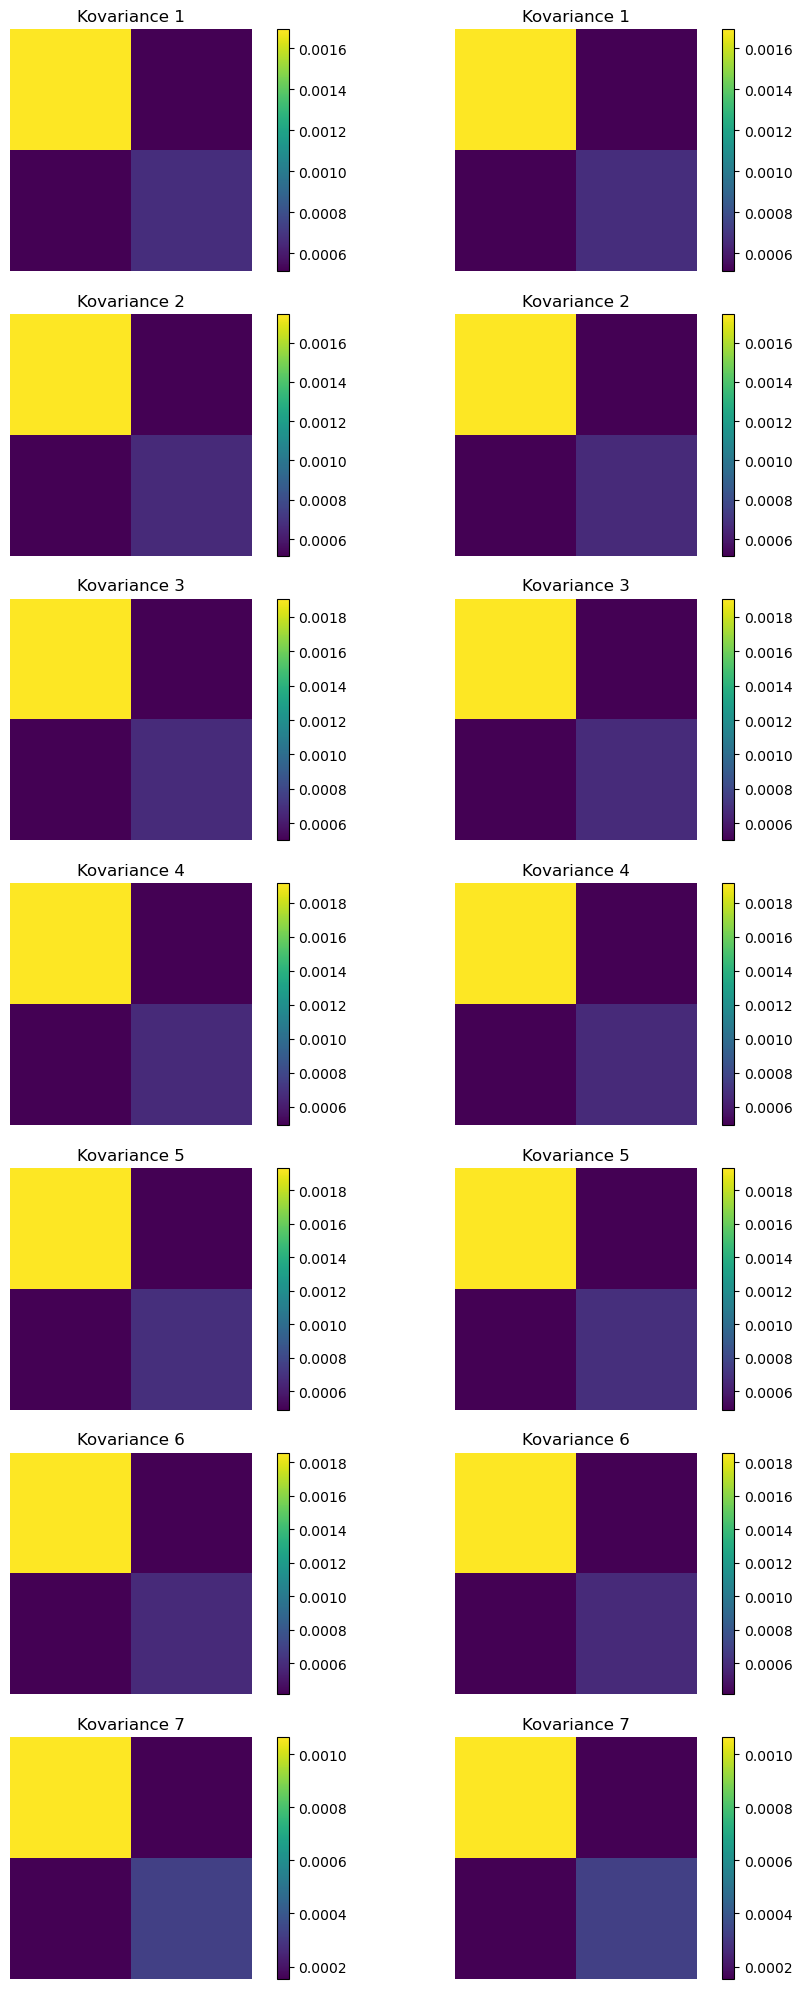

In [19]:
matice = portfolio.tvorba_matice(a, 240, 20)

fig, axs = plt.subplots(7, 2, figsize=(10, 20))
for i in range(7):
    for j in range(2):
        im_plot = axs[i, j].imshow(matice[i])
        axs[i, j].set_title(f"Kovariance {i + 1}")
        axs[i, j].axis('off')
        fig.colorbar(im_plot, ax=axs[i, j])


plt.tight_layout()
plt.show()

Funkce vytvoří matici ve tvaru:

\begin{pmatrix}
  2kov11  & 2kov12  & 1 \\

  2kov21 & 2kov22 & 1 \\

  1    &   1     & 0 \\
\end{pmatrix}

In [20]:
matice_kov = portfolio.kovariancni_matice(matice, 240, 20)

Vytvoří inverzi předešlé matice.

In [21]:
mat_inv = portfolio.inverze(matice_kov)

Hodnoty c jsou hodnoty posledního řádku matice mat_inv kromě posledního prvku. Pří hledání minimálního rizika portfolia a jemu příslušnému výnosu platí, že váhy portfolia jsou rovny hodnotám c.

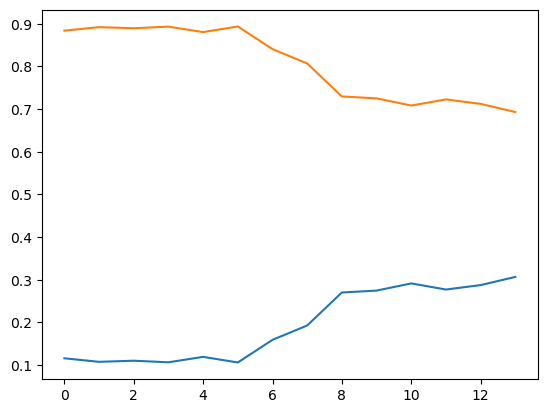

In [22]:
c = portfolio.c(mat_inv, 240, 20)

plt.plot(np.array(c))

### Optimální portfolio - minimalizace rizika a jemu daný výnos

Vypočítáme výnos portfolia při minimálním riziku, využijeme vzorec:

$optvynos =  \sum_{i=1}^{pocetakcii} mv_{i}$

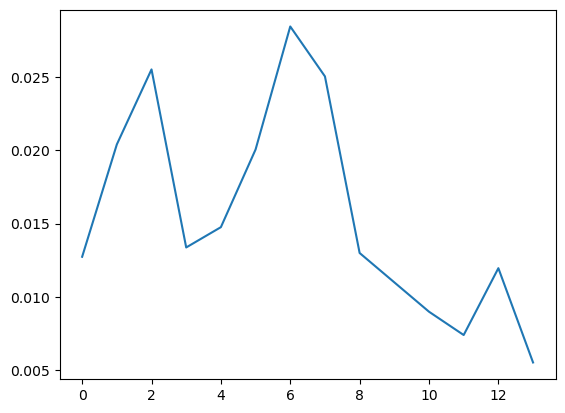

In [23]:
optvynos = portfolio.optimalizace_vynos([mv1, mv2], c)
plt.plot(optvynos)
plt.show()

Vypočítáme minimální riziko portfolia, využijeme vzorec:

$optriziko = \sum_{i=1}^{pocetakcii}\sum_{j=1}^{pocetakcii} c[i] c[j] kov_{ij}$

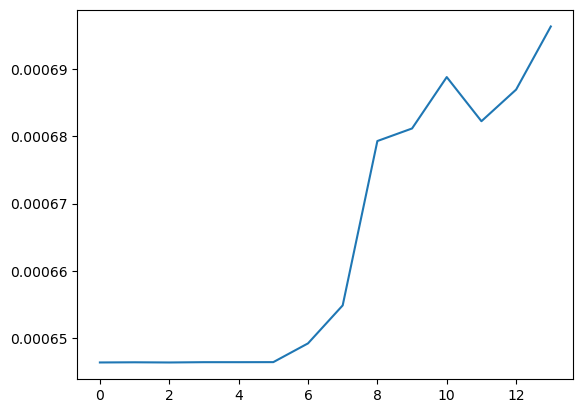

In [24]:
optriziko = portfolio.optimalizace_riziko(matice, c)

plt.plot(optriziko)
plt.show()

Proměnné d a di jsou pomocné proměnné, nedávají nám žádné podstatné informace o našem portfoliu. Jsou ale potřebné k dalším výpočtům.

$$n = pocetakcii$$

- di:

$di=\sum_{j=1}^{n} a_{ij} mv_j$, kde $a_{ij}$ je prvek mat_inv kromě posledního řádku a sloupce.

- d:

$d=\sum_{i=1}^{n}\sum_{j=1}^{n} a_{ij} mv_{i} mv_{j}$

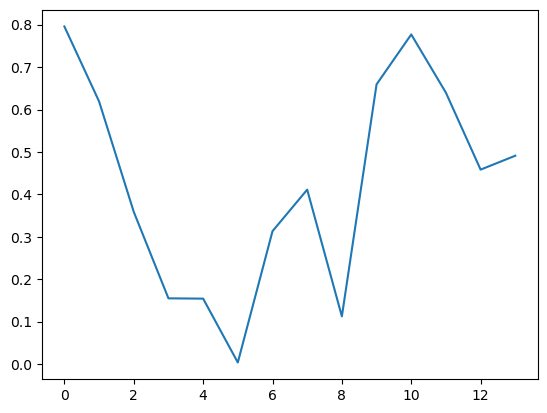

In [25]:
d = portfolio.d(mat_inv, [mv1, mv2])
plt.plot(d)
plt.show()

In [26]:
di = portfolio.di(mat_inv, [mv1, mv2])
print(di)

[array([-17.2640061,  17.2640061]), array([-14.9764691,  14.9764691]), array([-10.65946377,  10.65946377]), array([-6.97903839,  6.97903839]), array([-6.85403119,  6.85403119]), array([ 1.07617315, -1.07617315]), array([ 12.02117025, -12.02117025]), array([ 14.36778578, -14.36778578]), array([ 8.04482568, -8.04482568]), array([ 19.74727175, -19.74727175]), array([ 21.96389382, -21.96389382]), array([ 20.16876273, -20.16876273]), array([ 17.52598384, -17.52598384]), array([ 18.92447072, -18.92447072])]


### Portfolio s daným výnosem 7%

Při výpočtu portfolia s danným výnosem, v našem případě investor poždaduje výnos 7%, musíme spočítat parametr, který nám poté pomůže při výpočtu vah portfolia, a poté samontého rizika při daném výnosu.

$parvyn=\frac{0.07-optvynos}{d}$

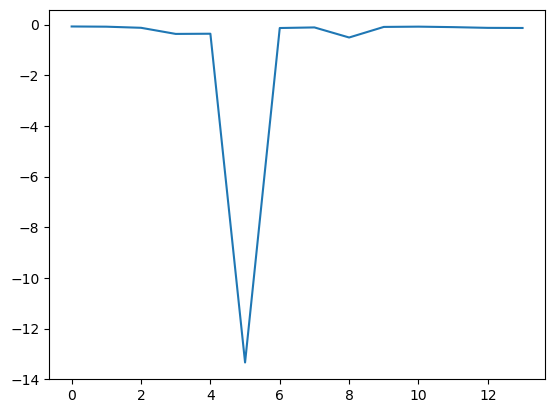

In [27]:
par_vyn = portfolio.par_vynos(optvynos, d, 0.07)
plt.plot(par_vyn)
plt.show()

V předešlé buňce jsme se věnovali výpočtu parametru, nyní můžeme tento parametr využítpři výpočtu vah a rizika.

- Váhy:

$w[i]=c_i + parvyn * di$

- Riziko:

$riziko=\sum_{i=1}^{pocetakcii} w_i^2 kov_{ii}^2 - 2 \sum_{i=1}^{pocetakcii-1} \sum_{j=i+1}^{pocetakcii} w_i w_j kov_{ij}$

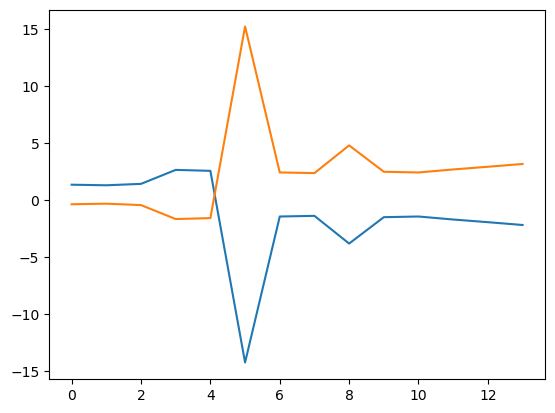

In [28]:
vahy_vyn = portfolio.vahy(c, di, par_vyn)
plt.plot(np.array(vahy_vyn))
plt.show()

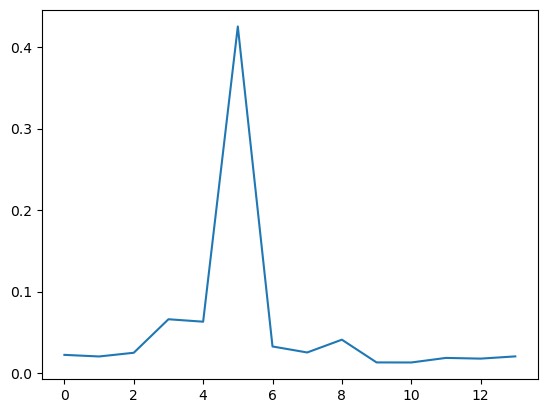

In [29]:
riziko = portfolio.riziko_dan(vahy_vyn, matice)
plt.plot(riziko)
plt.show()

### Portfolio s daným rizikem 7%

Stejně jako u portfolia s daným výnosem musíme vypočítat parametr.

$parriz=(\frac{2(0.049-optriz)}{d}) $

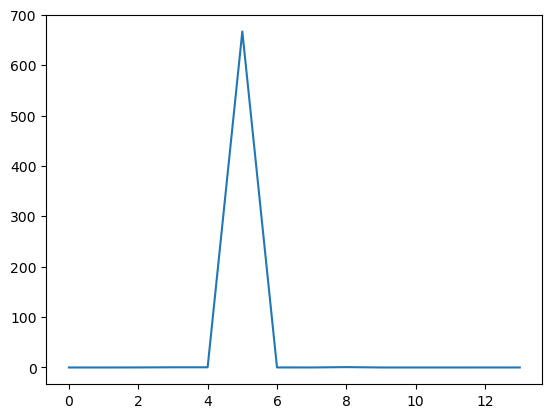

In [30]:
par_riz = portfolio.par_riz(optriziko, d, 0.049)
plt.plot(par_riz)
plt.show()

Nakonec vyočítáme váhy portfolia pomocí vzorce využitého pro portfolio s daným výnosem a nakonec spočítáme příslušný výnos.

$vynos= \sum_{i=1}^{pocetakcii} w_i stv_i$,

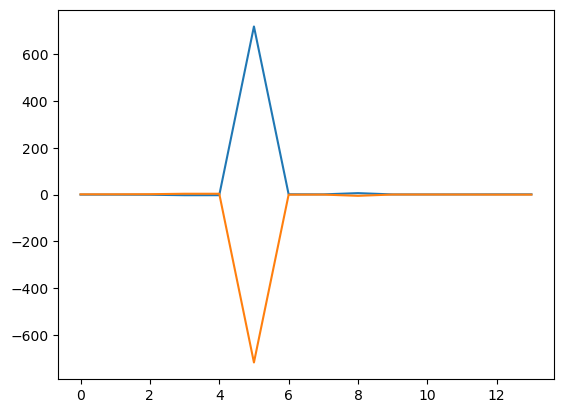

In [31]:
vahy_riz = portfolio.vahy(c, di, par_riz)
plt.plot(np.array(vahy_riz))
plt.show()


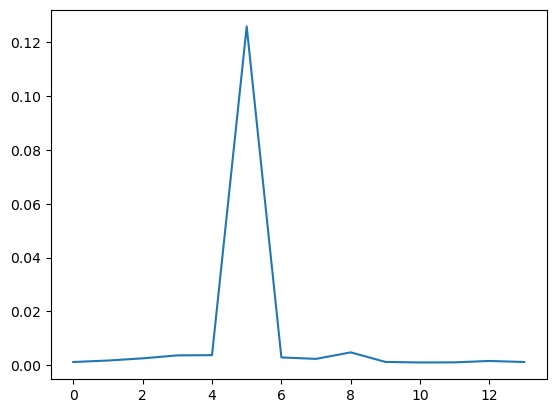

In [32]:
vynos = portfolio.vynos_dan(vahy_riz, [stv1, stv2])
plt.plot(vynos)
plt.show()

## Tisk

Všechny podstatně informace zjištěné v průběhu našich výpočtů jsou vytištěni do složky portfolio1 ve formě grafů. Najdeme zde nejdůležitější informace k jednotlivým akciím a také nejdůležitější informace k celému portfoliu.

V následujících buňkách tiskneme do složky portfolio1 vývoj cen našich dvou akccí, střední výnosy těchto akcií a střední rizika akcií. Vývoj je zaznamená zejména kvůli přehlednosti ve spojnicových grafech.

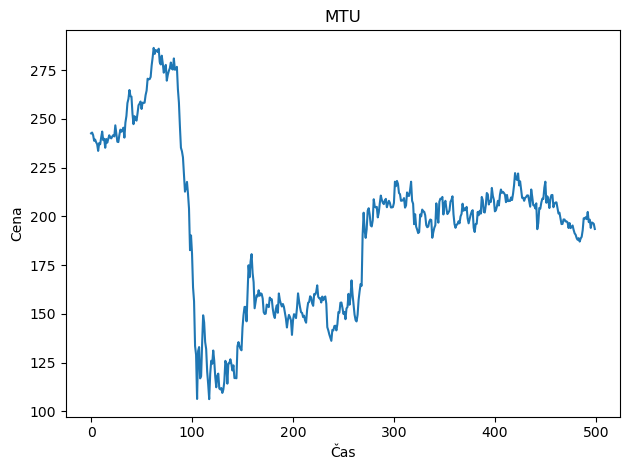

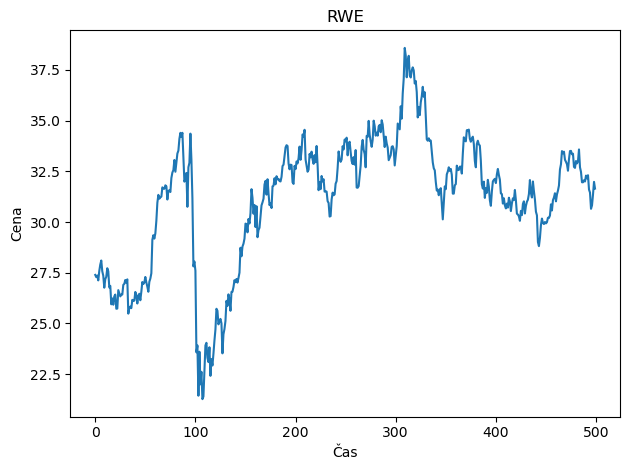

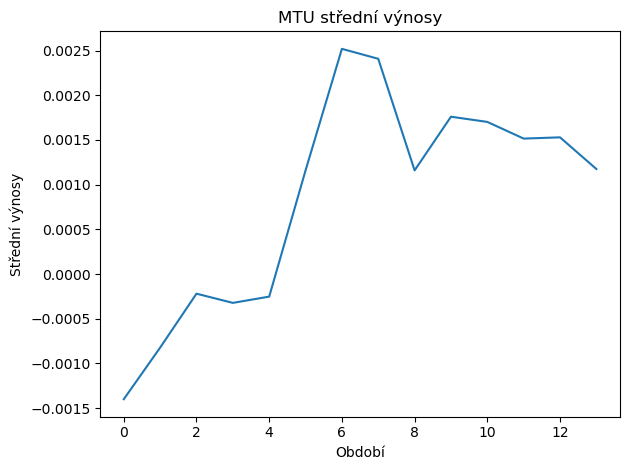

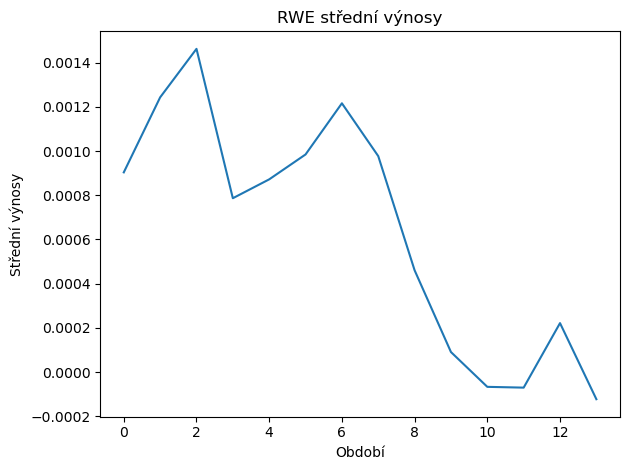

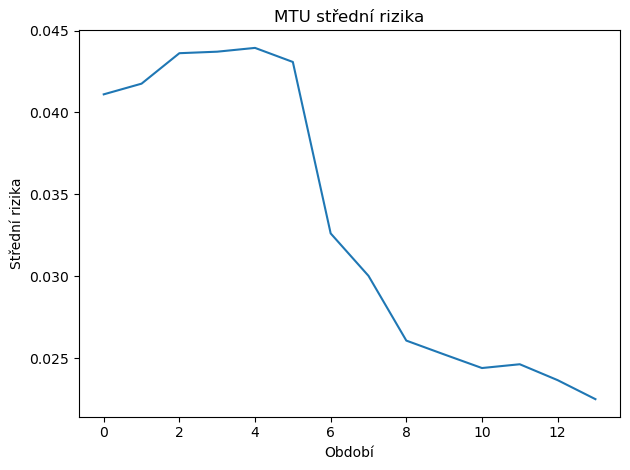

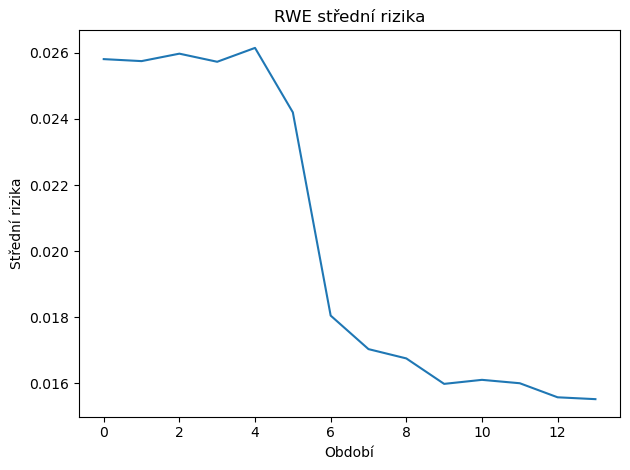

In [33]:
tisk.tisk_grafu(data1, "MTU", ["Čas", "Cena"], "portfolio_1/MTU")
tisk.tisk_grafu(data2, "RWE", ["Čas", "Cena"], "portfolio_1/RWE")
tisk.tisk_grafu(stv1, "MTU střední výnosy", ["Období", "Střední výnosy"], "portfolio_1/MTU")
tisk.tisk_grafu(stv2, "RWE střední výnosy", ["Období", "Střední výnosy"], "portfolio_1/RWE")
tisk.tisk_grafu(str1, "MTU střední rizika", ["Období", "Střední rizika"], "portfolio_1/MTU")
tisk.tisk_grafu(str2, "RWE střední rizika", ["Období", "Střední rizika"], "portfolio_1/RWE")

Funcke provádí tisk optimálního rizika jeho příslušného výnosu, rizika při dáném výnosu 7% a výnosy při daném riziku 7%. Data jsou pro přehlednost zpracované  ve formě sloupcových grafů a jsou tisknuty do složky portfolio1.

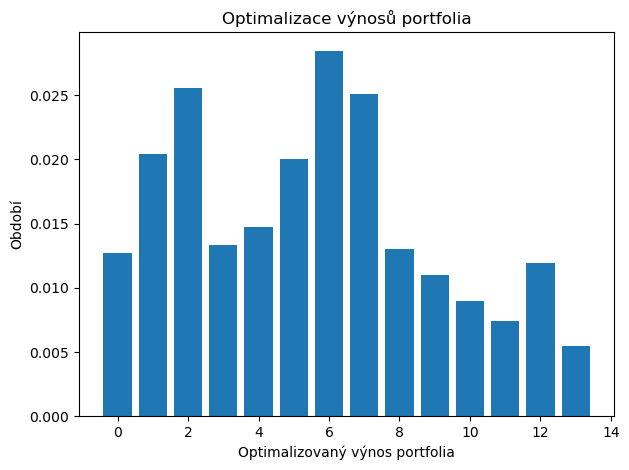

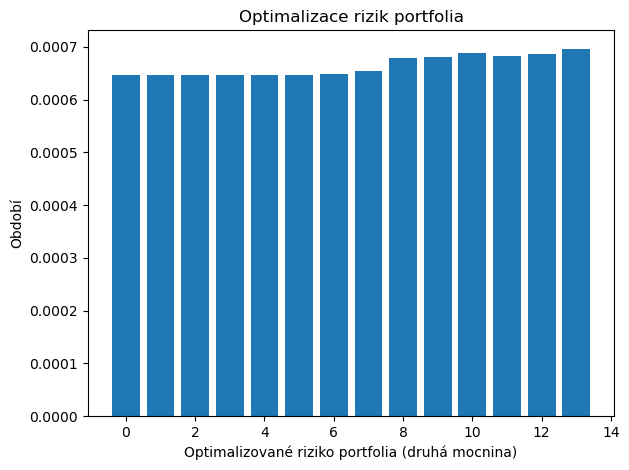

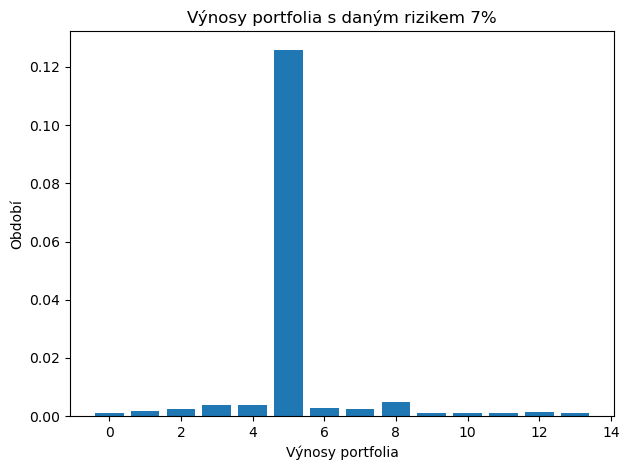

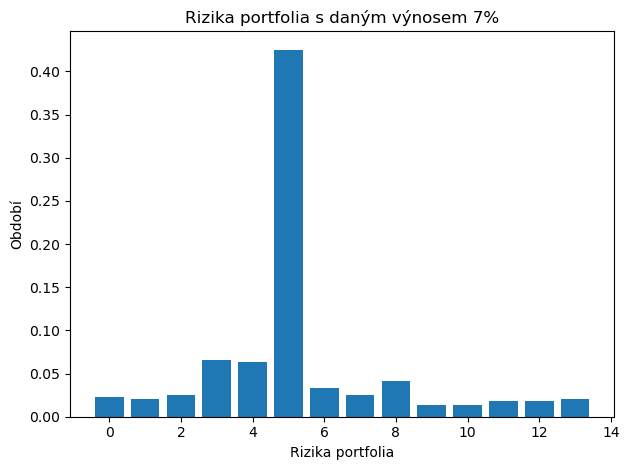

In [34]:
tisk.tisk_grafu_sloupec(optvynos, "Optimalizace výnosů portfolia", ["Optimalizovaný výnos portfolia", "Období"], "portfolio_1")
tisk.tisk_grafu_sloupec(optriziko, "Optimalizace rizik portfolia", ["Optimalizované riziko portfolia (druhá mocnina)", "Období"], "portfolio_1")
tisk.tisk_grafu_sloupec(vynos, "Výnosy portfolia s daným rizikem 7%", ["Výnosy portfolia", "Období"], "portfolio_1")
tisk.tisk_grafu_sloupec(riziko, "Rizika portfolia s daným výnosem 7%", ["Rizika portfolia", "Období"], "portfolio_1")